# Bike Sharing prediction Project

Problem Statement:Predict the count  of bikes rented on hourly basis 

In [44]:
'''Step 0)  Analysis of data
   Step 1)  Reading of data
   Step 2)  Prelimary analysis of data dropping of obvious feature
                i) Ids and other non important features
   Step 3)  Dealing with null values
                i)  If the number of null values is more than 50% Drop that columns
                ii) If null value is int/float fill the data by mean of that columns
                iii)If null value is object/category fill the data by mode of that columns
                iv) Convert the data into its appropriate data types
   Step 4)  Visualise the data
                i)This helps in seeing the correlation of data so we can drop the fields which are highly correlated
                ii)How clean is our data
   Step 5)  Check for regression assumptions
                i)normality
                ii)autocorrealtion
                iii)correaltions
                iv)outliers 
   Step 6)  Drop irrelevant features
   Step 7)  Create/ modify features
   Step 8)  Feature engineering
   Step 9)  Create dummy variables(For categorical features)
   Step 10)  Train and test Split()
   Step 11) Fit and score the model
                i)Model Cross Validation
                ii)HyperparameterTuning 
   Step 12) Present the results'''

'Step 0)  Analysis of data\n   Step 1)  Reading of data\n   Step 2)  Prelimary analysis of data dropping of obvious feature\n                i) Ids and other non important features\n   Step 3)  Dealing with null values\n                i)  If the number of null values is more than 50% Drop that columns\n                ii) If null value is int/float fill the data by mean of that columns\n                iii)If null value is object/category fill the data by mode of that columns\n                iv) Convert the data into its appropriate data types\n   Step 4)  Visualise the data\n                i)This helps in seeing the correlation of data so we can drop the fields which are highly correlated\n                ii)How clean is our data\n   Step 5)  Check for regression assumptions\n                i)normality\n                ii)autocorrealtion\n                iii)correaltions\n                iv)outliers \n   Step 6)  Drop irrelevant features\n   Step 7)  Create/ modify features\n   St

In [45]:
''''Step 0) Analysis OF data
- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered'''

"'Step 0) Analysis OF data\n- instant: record index\n- dteday : date\n- season : season (1:winter, 2:spring, 3:summer, 4:fall)\n- yr : year (0: 2011, 1:2012)\n- mnth : month ( 1 to 12)\n- hr : hour (0 to 23)\n- holiday : weather day is holiday or not (extracted from [Web Link])\n- weekday : day of the week\n- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.\n+ weathersit :\n- 1: Clear, Few clouds, Partly cloudy, Partly cloudy\n- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\n- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\n- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog\n- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)\n- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)\n- hum: Normalized humidity. Th

Step 1) Reading of data and importing all the important header files

In [46]:
#importing all the imporant header file
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import xgboost
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
plt.style.use('bmh')

In [47]:
#To read the csv file
df=pd.read_csv("hour.csv")
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [48]:
#To check the number of row and colums in the dataset
df.shape

(17379, 17)

In [49]:
#to check the data types and null values of the field
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [50]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [51]:
'''Step 2)  Prelimary analysis of data dropping of obvious feature
                i) "instant" beacuse it is not impoartant
                ii)"Yr" cause we can take this field again from dte field
                iii)"mth" cause we can take this field again from dte field
                iv)"casual" cause  the problem statement says count not which one
                v)"registered" cause the problem statement says count not which one
'''                

'Step 2)  Prelimary analysis of data dropping of obvious feature\n                i) "instant" beacuse it is not impoartant\n                ii)"Yr" cause we can take this field again from dte field\n                iii)"mth" cause we can take this field again from dte field\n                iv)"casual" cause  the problem statement says count not which one\n                v)"registered" cause the problem statement says count not which one\n'

In [52]:
df["dteday"]=pd.to_datetime(df["dteday"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [53]:
df=df.drop(["instant","yr",'mnth','casual','registered','dteday'],axis=1)
df

,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [54]:
 ''''  Step 3)  Dealing with null values
                i)  If the number of null values is more than 50% Drop that columns
                ii) If null value is int/float fill the data by mean of that columns
                iii)If null value is object/category fill the data by mode of that columns
            '''

"'  Step 3)  Dealing with null values\n               i)  If the number of null values is more than 50% Drop that columns\n               ii) If null value is int/float fill the data by mean of that columns\n               iii)If null value is object/category fill the data by mode of that columns\n           "

In [55]:
#to check the fields which contains null values if any 
df.isnull().sum()

season        0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [56]:
df["season"]=df["season"].astype("category")
df["hr"]=df["hr"].astype("category")
df["weekday"]=df["weekday"].astype("category")
df["workingday"]=df["workingday"].astype("category")
df["weathersit"]=df["weathersit"].astype("category")
df["holiday"]=df["holiday"].astype("category")

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   hr          17379 non-null  category
 2   holiday     17379 non-null  category
 3   weekday     17379 non-null  category
 4   workingday  17379 non-null  category
 5   weathersit  17379 non-null  category
 6   temp        17379 non-null  float64 
 7   atemp       17379 non-null  float64 
 8   hum         17379 non-null  float64 
 9   windspeed   17379 non-null  float64 
 10  cnt         17379 non-null  int64   
dtypes: category(6), float64(4), int64(1)
memory usage: 782.6 KB


In [58]:
''' Step 4)  Visualise the data
                i)This helps in seeing the correlation of data so we can drop the fields which are highly correlated
                ii)How clean is our data
'''

' Step 4)  Visualise the data\n                i)This helps in seeing the correlation of data so we can drop the fields which are highly correlated\n                ii)How clean is our data\n'

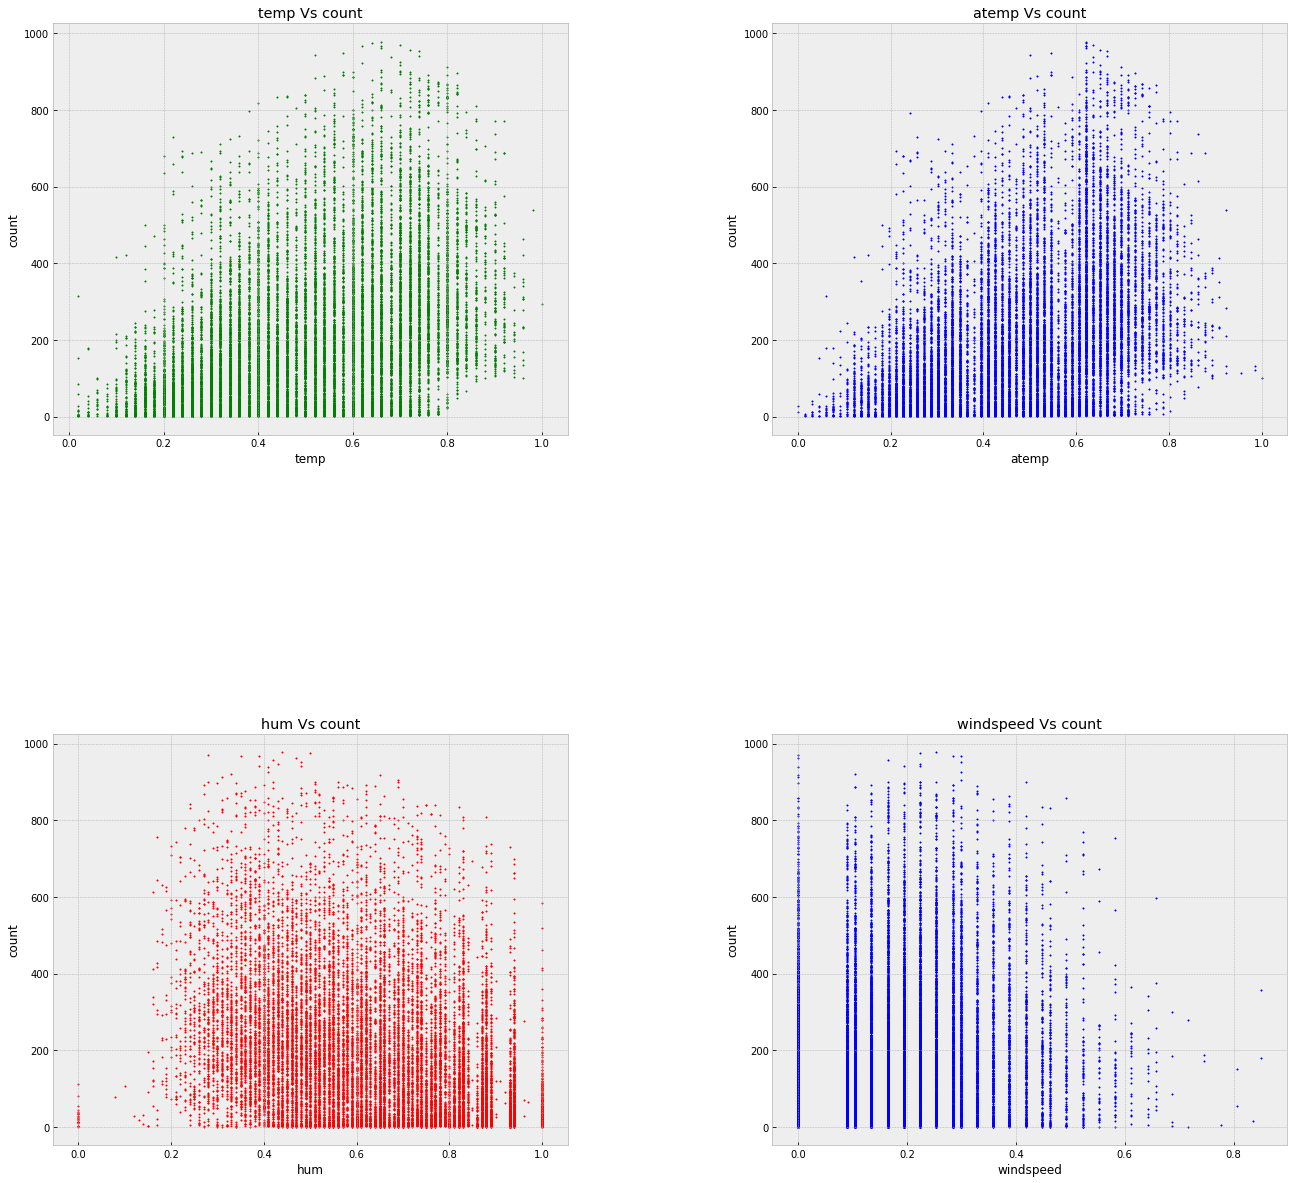

In [59]:
#continious variables visualization
c_features = list(df[['temp', 'atemp', 'hum', 'windspeed']].columns)
color = ['a','g','b','r','b','g','b','r','b']
sp = 1
for columns in c_features:
    plt.subplot(2,2,sp)
    plt.title(columns + ' Vs count')
    plt.xlabel(columns)
    plt.ylabel('count')
    plt.scatter(df[columns],df['cnt'], s=2, c=color[sp])
    sp+=1
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(20.5, 20.5)

/home/akaul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  # This is added back by InteractiveShellApp.init_path()


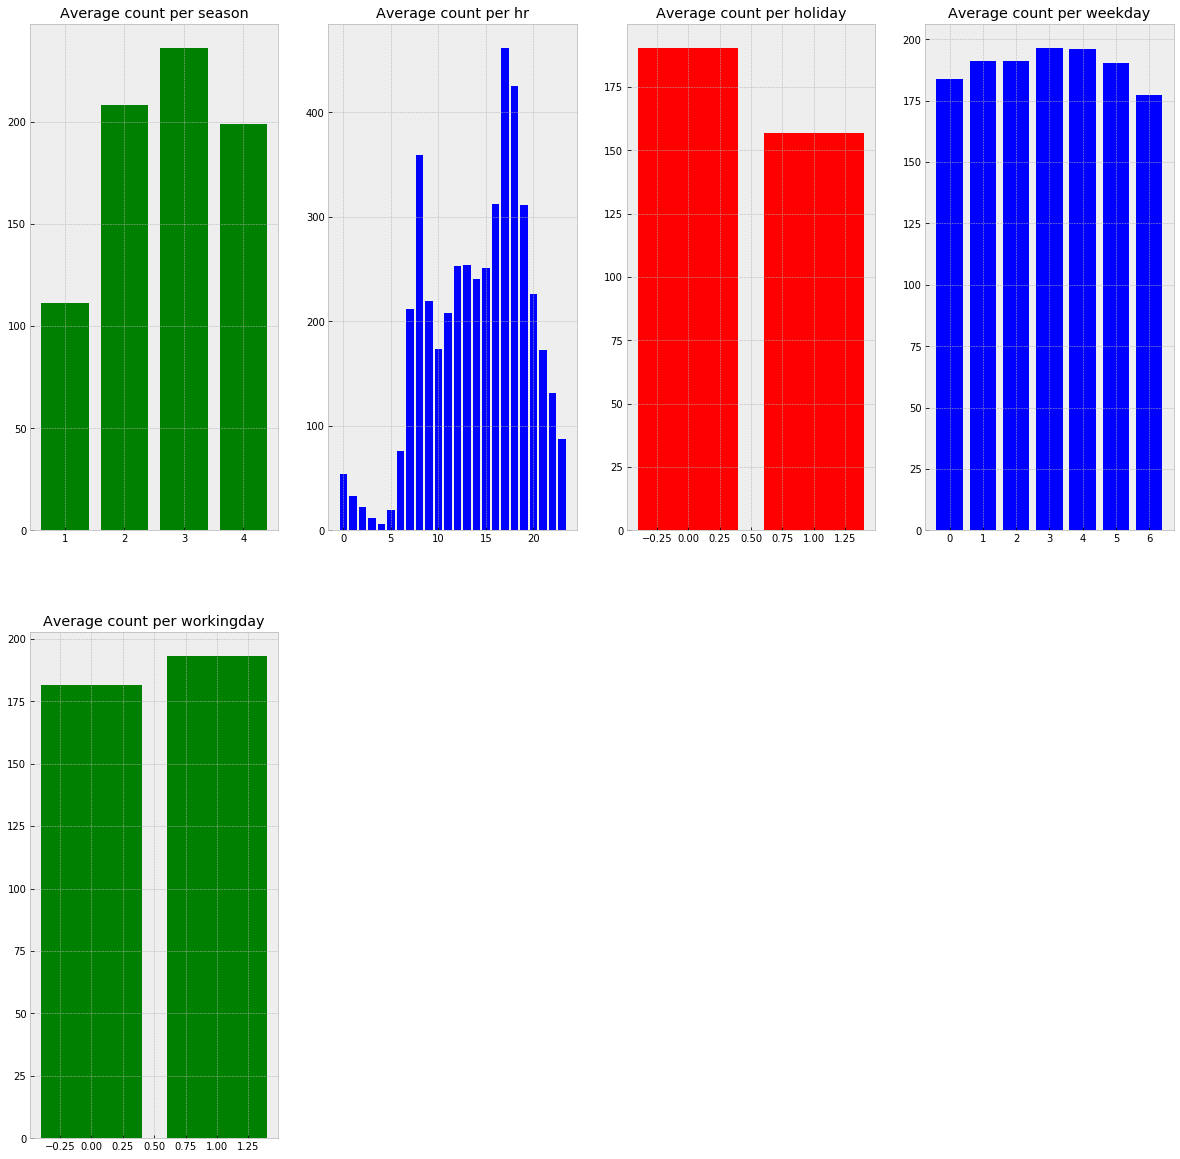

In [60]:
#categorical variables visualization
cg_features = list(df[['season','hr','holiday','weekday','workingday']].columns)
sp=1
for columns in cg_features:
    plt.subplot(2,4,sp)
    plt.title('Average count per ' + columns)
    cat_list = df[columns].unique()
    cat_average = df.groupby(columns).mean()['cnt']
    plt.bar(cat_list,cat_average, color = color[sp])
    sp+=1
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(20.5, 20.5)

we will drop weeekday and working data because we dont see much difference and they are highly correlated 

In [61]:
df=df.drop(["weekday",'workingday'],axis=1)
df

,season,hr,holiday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,1,0.24,0.2879,0.81,0.0000,16
1,1,1,0,1,0.22,0.2727,0.80,0.0000,40
2,1,2,0,1,0.22,0.2727,0.80,0.0000,32
3,1,3,0,1,0.24,0.2879,0.75,0.0000,13
4,1,4,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...
17374,1,19,0,2,0.26,0.2576,0.60,0.1642,119
17375,1,20,0,2,0.26,0.2576,0.60,0.1642,89
17376,1,21,0,1,0.26,0.2576,0.60,0.1642,90
17377,1,22,0,1,0.26,0.2727,0.56,0.1343,61


In [62]:
'''  Step 5)  Check for regression assumptions
                i)normality
                ii)autocorrealtion
                iii)correaltions
                iv)outliers'''

'  Step 5)  Check for regression assumptions\n                i)normality\n                ii)autocorrealtion\n                iii)correaltions\n                iv)outliers'

In [63]:
df.corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
cnt,0.404772,0.400929,-0.322911,0.093234,1.000000


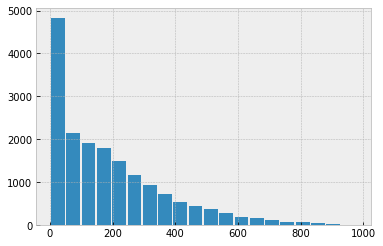

In [64]:
df1=pd.to_numeric(df["cnt"],downcast="float")
plt.figure()
df1.hist(rwidth=0.9, bins=20)

as you can see the figure is right skewed so we will use log function to convert the to normal distributions

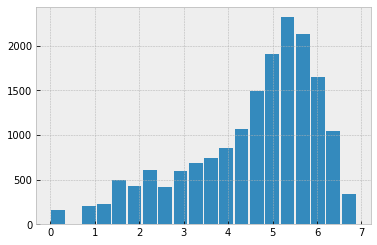

In [65]:
df2=np.log(df1)
df2
plt.figure()
df2.hist(rwidth=0.9, bins=20)

In [66]:
df['cnt']=np.log(df['cnt'])

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474708, 0.4704955 , 0.49622798, 0.49404052, 0.4679593 ,
        0.47732034, 0.52675766, 0.59145737, 0.6520156 , 0.7151954 ,
        0.80591017, 0.92530966, 1.        , 0.92530966, 0.80591017,
        0.7151954 , 0.6520156 , 0.59145737, 0.52675766, 0.47732034,
        0.4679593 , 0.49404052, 0.49622798, 0.4704955 , 0.45474708],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x7f13f40db2d0>)

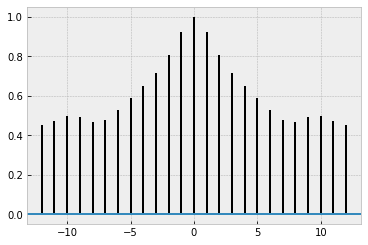

In [67]:
#now we will check for autocorreation
plt.acorr(df1,maxlags=12)

Step 7)  Create/ modify features

In [68]:
days=3
df["predict"]=df['cnt'].shift(-days)
df=df.dropna()

/home/akaul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.8793462 , 0.87947774, 0.8797621 , 0.88065755, 0.8828221 ,
        0.88772357, 0.89598215, 0.90760094, 0.92394555, 0.9454562 ,
        0.9691762 , 0.9893343 , 1.        , 0.9893343 , 0.9691762 ,
        0.9454562 , 0.92394555, 0.90760094, 0.89598215, 0.88772357,
        0.8828221 , 0.88065755, 0.8797621 , 0.87947774, 0.8793462 ],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x7f13f4040810>)

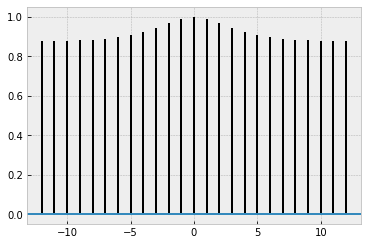

In [69]:
df["predict"]=pd.to_numeric(df["predict"],downcast='float')
df
plt.acorr(df["predict"],maxlags=12)

step 9) Create dummy varibles 

In [70]:
df_dumb= pd.get_dummies(df)
df_dumb

,temp,atemp,hum,windspeed,cnt,predict,season_1,season_2,season_3,season_4,...,hr_20,hr_21,hr_22,hr_23,holiday_0,holiday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0.24,0.2879,0.81,0.0000,2.772589,2.564949,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0.22,0.2727,0.80,0.0000,3.688879,0.000000,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0.22,0.2727,0.80,0.0000,3.465736,0.000000,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0.24,0.2879,0.75,0.0000,2.564949,0.693147,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0.24,0.2879,0.75,0.0000,0.000000,1.098612,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17371,0.26,0.2576,0.48,0.1940,5.365976,4.779123,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
17372,0.26,0.2879,0.48,0.0896,5.099866,4.488636,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
17373,0.26,0.2727,0.48,0.1343,4.804021,4.499810,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
17374,0.26,0.2576,0.60,0.1642,4.779123,4.110874,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


 Step 10)  Train and test Split()

In [71]:
y=df_dumb[["predict"]]
x=df_dumb.drop(["predict"],axis=1)
#creating a training set for 70%
tr_size=0.7*len(x)
tr_size=int(tr_size)
x_train=x.values[0:tr_size]
x_test=x.values[tr_size:len(x)]
y_train=y.values[0:tr_size]
y_test=y.values[tr_size:len(y)]

   Step 11) Fit and score the model
                i)Model Cross Validation
                ii)HyperparameterTuning 

In [72]:
y_test

array([[3.583519 ],
       [2.3978953],
       [1.9459101],
       ...,
       [4.4998097],
       [4.1108737],
       [3.8918202]], dtype=float32)

In [73]:
#linear
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_vals=lr.predict(x_test)
print(lr_vals)
lr_test_score=math.sqrt(mean_squared_error(y_test,lr_vals))
print(lr_test_score)

[[2.35931396]
 [2.22271729]
 [3.35498047]
 ...
 [4.20550537]
 [3.98162842]
 [3.55792236]]
0.6934911593504688


In [74]:
#svr
svr=SVR()
svr.fit(x_train,y_train)
svr_vals=svr.predict(x_test)
svr_test_score=math.sqrt(mean_squared_error(y_test,svr_vals))
print(svr_test_score)

/home/akaul/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5695148551366878


In [75]:
#decisiontree
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_vals=dtr.predict(x_test)
print(dtr_vals)
dtr_test_score=math.sqrt(mean_squared_error(y_test,dtr_vals))
dtr_test_score

[3.25809646 1.79175949 2.30258512 ... 4.18965483 4.15888309 3.82864141]


0.7981025746912283

In [76]:
#randomforrest
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_vals=rfr.predict(x_test)
rfr_test_score=math.sqrt(mean_squared_error(y_test,rfr_vals))
rfr_test_score

/home/akaul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.6244913997002861

In [77]:
#xgboost 
#xgboost Algorthim
xg=xgboost.XGBRegressor()
#to train the model
xg.fit(x_train,y_train)
#prediction
xg_vals=xg.predict(x_test)
print(xg_vals)
xg_test_score=math.sqrt(mean_squared_error(y_test,xg_vals))
xg_test_score

[3.446606  2.0199692 1.9355476 ... 4.015602  3.7505283 3.459004 ]


0.6068831627686714

Now we will do the cross validation

In [78]:
cv_svr_result=cross_validate(svr,x,y,cv=10,return_train_score=True,scoring='r2')
cv_dtr_result=cross_validate(dtr,x,y,cv=10,return_train_score=True,scoring='r2')
cv_lr_result=cross_validate(lr,x,y,cv=10,return_train_score=True,scoring='r2')
cv_rfr_result=cross_validate(rfr,x,y,cv=10,return_train_score=True,scoring='r2')
cv_xg_result=cross_validate(xg,x,y,cv=10,return_train_score=True,scoring='r2')

/home/akaul/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/akaul/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/akaul/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/akaul/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [79]:
lr_result_test_avg=np.average(cv_lr_result["test_score"])
xg_result_test_avg=np.average(cv_xg_result["test_score"])
dtr_result_test_avg=np.average(cv_dtr_result["test_score"])
rfr_result_test_avg=np.average(cv_rfr_result["test_score"])
svr_result_test_avg=np.average(cv_svr_result["test_score"])
dtr_result_train_avg=np.average(cv_dtr_result["train_score"])
rfr_result_train_avg=np.average(cv_rfr_result["train_score"])
svr_result_train_avg=np.average(cv_svr_result["train_score"])
lr_result_train_avg=np.average(cv_lr_result["train_score"])
xg_result_train_avg=np.average(cv_xg_result["train_score"])
data=[{"XGboost":xg_result_test_avg,"Linear":lr_result_test_avg,"SVR":svr_result_test_avg,"DecisionTree":dtr_result_test_avg,"RandomForrest":rfr_result_test_avg},{"XGboost":xg_result_train_avg,"Linear":lr_result_train_avg,"SVR":svr_result_train_avg,"DecisionTree":dtr_result_train_avg,"RandomForrest":rfr_result_train_avg}]
da=pd.DataFrame(data,index=["Test","Train"])
da

,XGboost,Linear,SVR,DecisionTree,RandomForrest
Test,0.813680,0.746802,0.812352,0.670745,0.811999
Train,0.931379,0.794583,0.851726,0.999705,0.980915


Now from the Cross valdiation we can see which is our best fit model 
Now to which which is the best paprmaters for that we can do that by using hyperparameter tuning

# Now we will perform hyperparameter tunung of SVR beaccuse difference between the traina and test score is less

In [86]:
kernel=['linear','rbf']
degree=[1,2,3,4,5]
gamma=['scale','auto']
C=[1.0, 2.0,3.0,5.0,10.0]
svr_hyper={'kernel':kernel,'degree':degree,'gamma':gamma,'C':C}    

In [87]:
#svr_grid=GridSearchCV(estimator=svr, param_grid=svr_hyper, scoring='r2', n_jobs=5)

In [88]:
#svr_grid.fit(x_train,y_train)

In [89]:
'''svr_grid_vals=svr_grid.predict(x_test)
print(xg_vals)'''

'svr_grid_vals=svr_grid.predict(x_test)\nprint(xg_vals)'

In [90]:
#GridSearchCV
gridsearch_cv_svr=GridSearchCV(estimator=svr,param_grid=svr_hyper,scoring='r2',n_jobs=4,cv=3,return_train_score=True)
gridsearch_cv_svr.fit(x_train,y_train)

/home/akaul/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': [1.0, 2.0, 3.0, 5.0, 10.0],
                         'degree': [1, 2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [91]:
gridsearch_cv_svr.best_estimator_

SVR(C=5.0, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [93]:
svr_grid=SVR(C=5.0, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
#to train the data into the model
svr_grid.fit(x_train,y_train)
#svr prediction
grid_svr=svr_grid.predict(x_test)
grid_svr

/home/akaul/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3.42767739, 2.16651027, 2.30567559, ..., 3.91397012, 3.87980012,
       3.46675652])

In [94]:
svr_square_test_grid_tuned=svr_grid.score(x_test,y_test)
svr_square_train_grid_tuned=svr_grid.score(x_train,y_train)
print(svr_square_test_grid_tuned,svr_square_train_grid_tuned)

0.8454439516281447 0.8595293290256076


In [95]:
#RandomSearchCV
random_cv_svr=RandomizedSearchCV(estimator=svr,param_distributions=svr_hyper,n_iter=100
                             , scoring='r2',
                             n_jobs=4, cv=3, verbose=6, random_state=12, return_train_score=True)
random_cv_svr.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   27.6s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  6.3min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 11.9min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed: 24.8min finished
/home/akaul/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=100, n_jobs=4,
                   param_distributions={'C': [1.0, 2.0, 3.0, 5.0, 10.0],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=12, refit=True,
                   return_train_score=True, scoring='r2', verbose=6)

In [96]:
random_cv_svr.best_estimator_

SVR(C=5.0, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [97]:
#SVM
svr_random=SVR(C=5.0, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
#to train the data into the model
svr_random.fit(x_train,y_train)
#linear prediction
random_svr=svr_random.predict(x_test)
random_svr

/home/akaul/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3.42767739, 2.16651027, 2.30567559, ..., 3.91397012, 3.87980012,
       3.46675652])

In [98]:
svr_square_test_random_tuned= svr_random.score(x_test,y_test)
svr_square_train_random_tuned= svr_random.score(x_train,y_train)
print(svr_square_test_random_tuned,svr_square_train_random_tuned)

0.8454439516281447 0.8595293290256076


In [101]:
#Compare the scores 
data_tuned_svr= [{"Randomserachcv":svr_square_test_random_tuned,"Gridsearchcv":svr_square_test_grid_tuned},
        {"Randomserachcv":svr_square_train_random_tuned,"Gridsearchcv":svr_square_train_grid_tuned}]
da_tuned_svr= pd.DataFrame(data_tuned_svr, index=['Test', 'Train'])
da_tuned_svr

,Randomserachcv,Gridsearchcv
Test,0.845444,0.845444
Train,0.859529,0.859529
